# Ch05-2 Pandas DataFrame 時間序列

# Outline

1. Indexing Time Series
2. Resampling Time Series Data
3. Manipulating Time Series Data
4. Time Series Visualization


In [287]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt



## if use google colab, then can use the following code to upload the file

# from google.colab import files
# uploaded = files.upload()

# import io 
# Titanics_data = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))


In [288]:
Titanic_data = pd.read_csv("./titanic.csv")

In [289]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Indexing Time Series


Pandas stores data and that information in dataframe objects.
read_csv() function:
- Can read string into datatime objects
- Need to specify 'parse_dates = True'
  
ISO 8601 format: yyyy-mm-dd hh:mm:ss


In [290]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

## 整併數據 -> dataframe

In [291]:
data = {'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units}
df_sales = pd.DataFrame(data)
print(df_sales)

                  Date    Company     Product Units
0  2019-08-01 08:00:00      Apple      iPhone     1
1  2019-08-15 12:00:00  Microsoft        XBox     1
2  2019-08-30 20:00:00     Amazon         Mop     2
3  2019-09-01 08:01:00      Apple        iPad     2
4  2019-09-15 12:01:00  Microsoft     Surface     1
5  2019-09-30 20:01:00     Amazon  Decoration     1
6  2019-10-01 08:02:00      Apple      MacPro     1
7  2019-10-15 12:02:00  Microsoft   Office365     6
8  2019-10-30 20:02:00     Amazon         Pen    10


In [292]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     9 non-null      object
 1   Company  9 non-null      object
 2   Product  9 non-null      object
 3   Units    9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


## data column is not in datetime format, so we need to convert it to datetime format

In [293]:
# Convert the 'Date' column from string to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

print(df_sales)




                 Date    Company     Product Units
0 2019-08-01 08:00:00      Apple      iPhone     1
1 2019-08-15 12:00:00  Microsoft        XBox     1
2 2019-08-30 20:00:00     Amazon         Mop     2
3 2019-09-01 08:01:00      Apple        iPad     2
4 2019-09-15 12:01:00  Microsoft     Surface     1
5 2019-09-30 20:01:00     Amazon  Decoration     1
6 2019-10-01 08:02:00      Apple      MacPro     1
7 2019-10-15 12:02:00  Microsoft   Office365     6
8 2019-10-30 20:02:00     Amazon         Pen    10


In [294]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     9 non-null      datetime64[ns]
 1   Company  9 non-null      object        
 2   Product  9 non-null      object        
 3   Units    9 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 416.0+ bytes


## data column is not index, convert date to index

In [295]:
df_sales.set_index('Date', inplace=True)


In [296]:
df_sales

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [297]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-08-01 08:00:00 to 2019-10-30 20:02:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  9 non-null      object
 1   Product  9 non-null      object
 2   Units    9 non-null      object
dtypes: object(3)
memory usage: 288.0+ bytes


In [298]:
# selecting single datetime
# the .loc method can be used to select data by row and column

df_sales.loc['2019-08-01 08:00:00', 'Company']

'Apple'

In [299]:
df_sales.loc['2019-08-01 08:00:00']

Company     Apple
Product    iPhone
Units           1
Name: 2019-08-01 08:00:00, dtype: object

### partial string and Pandas supports a number of different ways to select data based on partial string indexing.

In [300]:
df_sales.loc['2019-08']

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2


In [301]:
# Here, we are going to give you more alternative ways to do that...

df_sales.loc['October, 2019']

,Company,Product,Units
Date,,,
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [302]:
df_sales.loc['2019-Oct-1']


,Company,Product,Units
Date,,,
2019-10-01 08:02:00,Apple,MacPro,1


In [303]:
df_sales.loc['2019']

,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [304]:
# slicing using dates/times
df_sales.loc['2019-09':'2019-10']

,Company,Product,Units
Date,,,
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


## we sometimes need to reindex a Series or Dataframe.
Reindeing involves provide a new index and the data will be realigned to the new index.

In [305]:
time = pd.to_datetime(['2019-09-01 08:01:00','2019-09-06 12:01:00','2019-09-10 12:01:00','2019-09-15 12:01:00'])

df_sales.reindex(time)

,Company,Product,Units
2019-09-01 08:01:00,Apple,iPad,2
2019-09-06 12:01:00,NaN,NaN,NaN
2019-09-10 12:01:00,NaN,NaN,NaN
2019-09-15 12:01:00,Microsoft,Surface,1


### Here, the reindex method returns a new Dataframe with the four rows corresponding to times in time

In [306]:
## when using reindex with missing entries, we can override the default behavior of filling with Nan.

## Forward fill

df_sales.reindex(time, method='ffill')

,Company,Product,Units
2019-09-01 08:01:00,Apple,iPad,2
2019-09-06 12:01:00,Apple,iPad,2
2019-09-10 12:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1


In [307]:
## Backward fill

df_sales.reindex(time, method='bfill')

,Company,Product,Units
2019-09-01 08:01:00,Apple,iPad,2
2019-09-06 12:01:00,Microsoft,Surface,1
2019-09-10 12:01:00,Microsoft,Surface,1
2019-09-15 12:01:00,Microsoft,Surface,1


# Resampling Time Series Data

In [308]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales




,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


In [309]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-08-01 08:00:00 to 2019-10-30 20:02:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  9 non-null      object
 1   Product  9 non-null      object
 2   Units    9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 288.0+ bytes


# Resampling

- Resampling methods over different time intervals: mean(), sum(), count(), etc.
- Downsampling: reduce datetime rows to slower frequency, i.e. daily to weekly, hourly to daily, etc.
- Upsampling: increase datetime rows to faster frequency, i.e. daily to hourly, etc.

In [310]:
# Aggregating means

daily_mean = df_sales[['Units']].resample('D').mean()
daily_mean

,Units
Date,
2019-08-01,1.0
2019-08-02,NaN
2019-08-03,NaN
2019-08-04,NaN
2019-08-05,NaN
...,...
2019-10-26,NaN
2019-10-27,NaN
2019-10-28,NaN


In [311]:
# Aggregating means

daily_mean = df_sales[['Units']].resample('M').mean()
daily_mean

,Units
Date,
2019-08-31,1.333333
2019-09-30,1.333333
2019-10-31,5.666667


## Verifying the results

In [312]:
daily_mean.loc["2019-10-31"]

Units    5.666667
Name: 2019-10-31 00:00:00, dtype: float64

In [313]:
df_sales.loc["2019-10", 'Units']

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [314]:
daily_sum = df_sales[['Units']].resample('M').sum()
daily_sum

,Units
Date,
2019-08-31,4
2019-09-30,4
2019-10-31,17


In [315]:
df_sales[['Units']].resample('M').sum().max()

Units    17
dtype: int64

In [316]:
df_sales.resample('W').count()

,Company,Product,Units
Date,,,
2019-08-04,1,1,1
2019-08-11,0,0,0
2019-08-18,1,1,1
2019-08-25,0,0,0
2019-09-01,2,2,2
2019-09-08,0,0,0
2019-09-15,1,1,1
2019-09-22,0,0,0
2019-09-29,0,0,0


## we also have 'T' for minutes, 'H' for hours, 'D' for days, 'W' for weeks, 'M' for months, 'Q' for quarters, and 'A' for years.

In [317]:
# Multiploying frequencies
df_sales.loc[:,'Units'].resample('2W').sum()

Date
2019-08-04     1
2019-08-18     1
2019-09-01     4
2019-09-15     1
2019-09-29     0
2019-10-13     2
2019-10-27     6
2019-11-10    10
Freq: 2W-SUN, Name: Units, dtype: int64

In [318]:
# Unsampling and filling
one_day = df_sales.loc['2019-10-01':'2019-10-30', 'Units']
one_day

Date
2019-10-01 08:02:00     1
2019-10-15 12:02:00     6
2019-10-30 20:02:00    10
Name: Units, dtype: int64

In [319]:
one_day.resample('4H').bfill()

Date
2019-10-01 08:00:00     1
2019-10-01 12:00:00     6
2019-10-01 16:00:00     6
2019-10-01 20:00:00     6
2019-10-02 00:00:00     6
                       ..
2019-10-30 04:00:00    10
2019-10-30 08:00:00    10
2019-10-30 12:00:00    10
2019-10-30 16:00:00    10
2019-10-30 20:00:00    10
Freq: 4h, Name: Units, Length: 178, dtype: int64

In [320]:
# df = pd.DataFrame(dict(A=[1, 1, 3], B=[None, 5, 6], C=[1, 2, 3],
#                      D=['3/11/2000', '3/12/2000', '3/13/2000']))

# df['D'] = pd.to_datetime(df['D'])

# print(df)
# df.groupby("A").last()

one_day.resample('4H').first().interpolate('linear')

Date
2019-10-01 08:00:00     1.000000
2019-10-01 12:00:00     1.058824
2019-10-01 16:00:00     1.117647
2019-10-01 20:00:00     1.176471
2019-10-02 00:00:00     1.235294
                         ...    
2019-10-30 04:00:00     9.826087
2019-10-30 08:00:00     9.869565
2019-10-30 12:00:00     9.913043
2019-10-30 16:00:00     9.956522
2019-10-30 20:00:00    10.000000
Freq: 4h, Name: Units, Length: 178, dtype: float64

# Manipulating time series data



In [321]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
# df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales



,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iPhone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-09-01 08:01:00,Apple,iPad,2
4,2019-09-15 12:01:00,Microsoft,Surface,1
5,2019-09-30 20:01:00,Amazon,Decoration,1
6,2019-10-01 08:02:00,Apple,MacPro,1
7,2019-10-15 12:02:00,Microsoft,Office365,6
8,2019-10-30 20:02:00,Amazon,Pen,10


## datetime format 

%Y: 年份（四位數）
%m: 月份（01-12）
%d: 日期（01-31）
%H: 小時（00-23）
%M: 分鐘（00-59）
%S: 秒（00-59）

In [322]:
df_sales['Formatted Date'] = df_sales['Date'].dt.strftime('%Y-%m-%d'); df_sales


,Date,Company,Product,Units,Formatted Date
0,2019-08-01 08:00:00,Apple,iPhone,1,2019-08-01
1,2019-08-15 12:00:00,Microsoft,XBox,1,2019-08-15
2,2019-08-30 20:00:00,Amazon,Mop,2,2019-08-30
3,2019-09-01 08:01:00,Apple,iPad,2,2019-09-01
4,2019-09-15 12:01:00,Microsoft,Surface,1,2019-09-15
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019-09-30
6,2019-10-01 08:02:00,Apple,MacPro,1,2019-10-01
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019-10-15
8,2019-10-30 20:02:00,Amazon,Pen,10,2019-10-30


### .str methods

In [323]:
# String methods
df_sales['Company'].str.upper()

0        APPLE
1    MICROSOFT
2       AMAZON
3        APPLE
4    MICROSOFT
5       AMAZON
6        APPLE
7    MICROSOFT
8       AMAZON
Name: Company, dtype: object

In [324]:
# String methods
df_sales['Product'].str.contains('i')

0     True
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
Name: Product, dtype: bool

In [325]:
df_sales[df_sales['Product'].str.contains('i')]

,Date,Company,Product,Units,Formatted Date
0,2019-08-01 08:00:00,Apple,iPhone,1,2019-08-01
3,2019-09-01 08:01:00,Apple,iPad,2,2019-09-01
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019-09-30
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019-10-15


In [326]:
# Boolean reduction
# This command inform us that there were 4 rows where .str.contains('i') was True

df_sales['Product'].str.contains('i').sum()

4

## Datetime methods

In [327]:
df_sales

,Date,Company,Product,Units,Formatted Date
0,2019-08-01 08:00:00,Apple,iPhone,1,2019-08-01
1,2019-08-15 12:00:00,Microsoft,XBox,1,2019-08-15
2,2019-08-30 20:00:00,Amazon,Mop,2,2019-08-30
3,2019-09-01 08:01:00,Apple,iPad,2,2019-09-01
4,2019-09-15 12:01:00,Microsoft,Surface,1,2019-09-15
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019-09-30
6,2019-10-01 08:02:00,Apple,MacPro,1,2019-10-01
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019-10-15
8,2019-10-30 20:02:00,Amazon,Pen,10,2019-10-30


In [328]:
df_sales['Date'].dt.hour
## this returns a new integer series where 0 is midnight and 23 is pm

0     8
1    12
2    20
3     8
4    12
5    20
6     8
7    12
8    20
Name: Date, dtype: int32

In [329]:
df_sales['Date'].dt.tz_localize('UTC')

0   2019-08-01 08:00:00+00:00
1   2019-08-15 12:00:00+00:00
2   2019-08-30 20:00:00+00:00
3   2019-09-01 08:01:00+00:00
4   2019-09-15 12:01:00+00:00
5   2019-09-30 20:01:00+00:00
6   2019-10-01 08:02:00+00:00
7   2019-10-15 12:02:00+00:00
8   2019-10-30 20:02:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [330]:
df_sales['Date'].dt.tz_localize('US/Eastern')

0   2019-08-01 08:00:00-04:00
1   2019-08-15 12:00:00-04:00
2   2019-08-30 20:00:00-04:00
3   2019-09-01 08:01:00-04:00
4   2019-09-15 12:01:00-04:00
5   2019-09-30 20:01:00-04:00
6   2019-10-01 08:02:00-04:00
7   2019-10-15 12:02:00-04:00
8   2019-10-30 20:02:00-04:00
Name: Date, dtype: datetime64[ns, US/Eastern]

In [331]:
df_sales['Date'].dt.tz_localize('US/Eastern').dt.tz_convert('Europe/Berlin')

0   2019-08-01 14:00:00+02:00
1   2019-08-15 18:00:00+02:00
2   2019-08-31 02:00:00+02:00
3   2019-09-01 14:01:00+02:00
4   2019-09-15 18:01:00+02:00
5   2019-10-01 02:01:00+02:00
6   2019-10-01 14:02:00+02:00
7   2019-10-15 18:02:00+02:00
8   2019-10-31 01:02:00+01:00
Name: Date, dtype: datetime64[ns, Europe/Berlin]

# Time series visualization


In [332]:
# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales




,Company,Product,Units
Date,,,
2019-08-01 08:00:00,Apple,iPhone,1
2019-08-15 12:00:00,Microsoft,XBox,1
2019-08-30 20:00:00,Amazon,Mop,2
2019-09-01 08:01:00,Apple,iPad,2
2019-09-15 12:01:00,Microsoft,Surface,1
2019-09-30 20:01:00,Amazon,Decoration,1
2019-10-01 08:02:00,Apple,MacPro,1
2019-10-15 12:02:00,Microsoft,Office365,6
2019-10-30 20:02:00,Amazon,Pen,10


<Axes: xlabel='Date'>

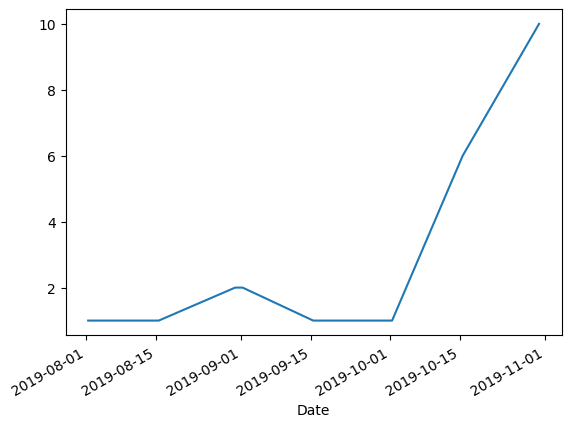

In [333]:
# pandas plot
df_sales['Units'].plot()

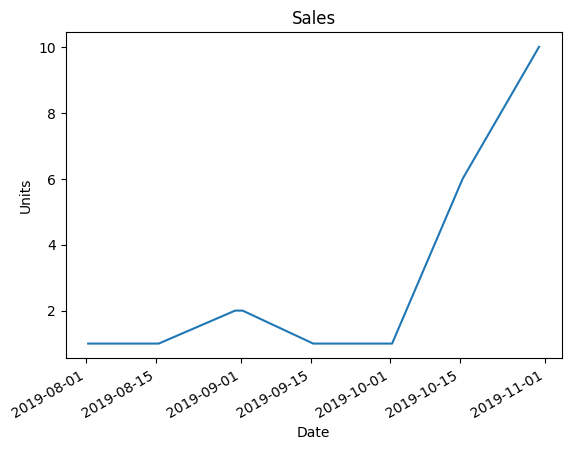

In [334]:
# labels and Title

df_sales['Units'].plot(title='Sales')
plt.ylabel('Units')
plt.show()

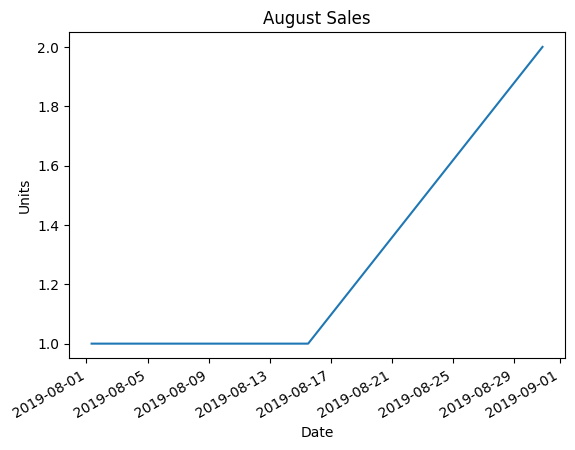

In [335]:
# One Month 
df_sales.loc['2019-08-01': '2019-08-31','Units'].plot(title='August Sales')
plt.ylabel('Units')
plt.show()


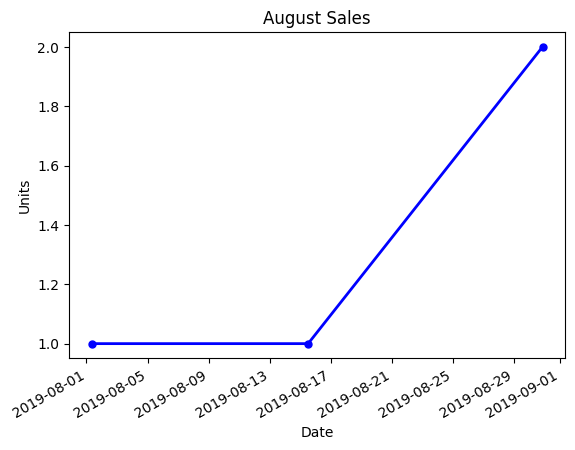

In [336]:
# plot style
df_sales.loc['2019-08-01': '2019-08-31','Units'].plot(title='August Sales', style='b.-', linewidth=2, markersize=10)
plt.ylabel('Units')
plt.show()  

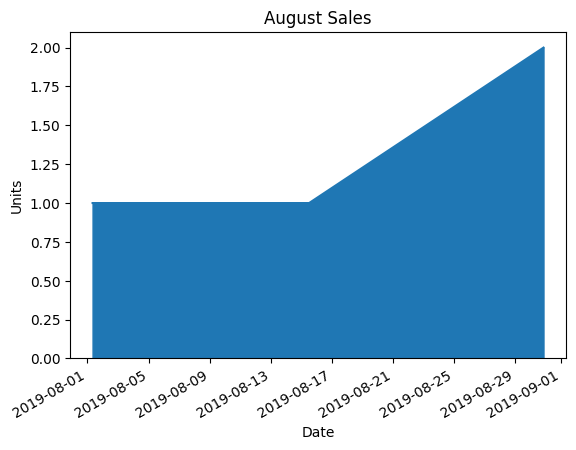

In [337]:
# plot style
df_sales.loc['2019-08-01': '2019-08-31','Units'].plot(title='August Sales', kind="area")
plt.ylabel('Units')
plt.show()  

In [338]:
price = [999,300,10,1399,1299,99,2999,199,20]
df_sales['price$'] = price
df_sales

,Company,Product,Units,price$
Date,,,,
2019-08-01 08:00:00,Apple,iPhone,1,999
2019-08-15 12:00:00,Microsoft,XBox,1,300
2019-08-30 20:00:00,Amazon,Mop,2,10
2019-09-01 08:01:00,Apple,iPad,2,1399
2019-09-15 12:01:00,Microsoft,Surface,1,1299
2019-09-30 20:01:00,Amazon,Decoration,1,99
2019-10-01 08:02:00,Apple,MacPro,1,2999
2019-10-15 12:02:00,Microsoft,Office365,6,199
2019-10-30 20:02:00,Amazon,Pen,10,20


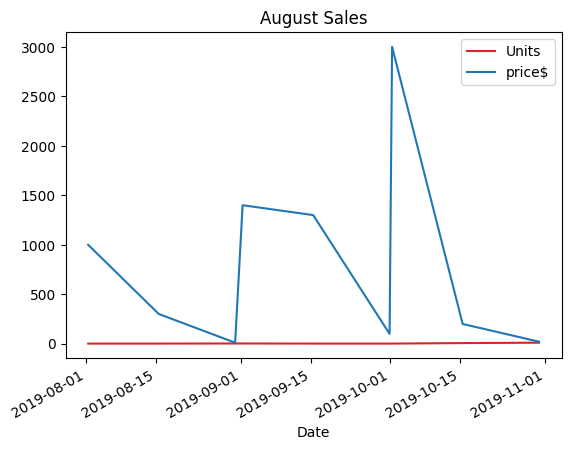

In [339]:
# Multiple columns

df_sales.loc['2019', ['Units', 'price$']].plot(title='August Sales', color=['tab:red', 'tab:blue'])
plt.show()

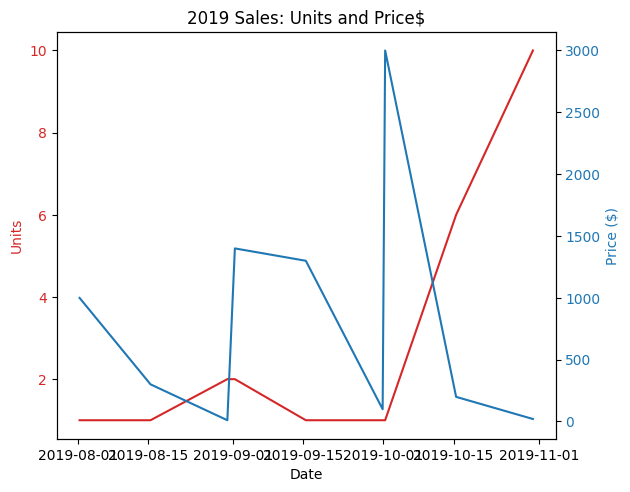

In [340]:

# Selecting data from 2019 with 'Units' and 'price$' columns
data_2019 = df_sales.loc['2019', ['Units', 'price$']]

# Plotting with a twin y-axis
fig, ax1 = plt.subplots()

# First y-axis for 'Units'
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Units', color=color)
ax1.plot(data_2019.index, data_2019['Units'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis for 'price$'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Price ($)', color=color)  # we already handled the x-label with ax1
ax2.plot(data_2019.index, data_2019['price$'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('2019 Sales: Units and Price$')
plt.show()

## 整合應用 (一些工作會用到的小技巧)

In [370]:
# 產生

import pandas as pd
from pandas.tseries.offsets import DateOffset
import time
from datetime import datetime


# Define the lists as shown in the image
Date = ['2019-08-01 08:00:00', '2019-08-15 12:00:00', '2019-08-30 20:00:00', 
        '2019-09-01 08:01:00', '2019-09-15 12:01:00', '2019-09-30 20:01:00', 
        '2019-10-01 08:02:00', '2019-10-15 12:02:00', '2019-10-30 20:02:00']

Company = ['Apple', 'Microsoft', 'Amazon', 
           'Apple', 'Microsoft', 'Amazon',
           'Apple', 'Microsoft', 'Amazon']

Product = ['iPhone', 'XBox', 'Mop', 
           'iPad', 'Surface', 'Decoration',
           'MacPro', 'Office365', 'Pen']

Units = ['1', '1', '2', 
         '2', '1', '1', 
         '1', '6', '10']

df_sales = pd.DataFrame({'Date': Date, 'Company': Company, 'Product': Product, 'Units': Units})

# Converting 'Date' to datetime
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Setting 'Date' as the index
# df_sales.set_index('Date', inplace=True)

# Converting 'Units' to numeric
df_sales['Units'] = pd.to_numeric(df_sales['Units'])


df_sales



,Date,Company,Product,Units
0,2019-08-01 08:00:00,Apple,iPhone,1
1,2019-08-15 12:00:00,Microsoft,XBox,1
2,2019-08-30 20:00:00,Amazon,Mop,2
3,2019-09-01 08:01:00,Apple,iPad,2
4,2019-09-15 12:01:00,Microsoft,Surface,1
5,2019-09-30 20:01:00,Amazon,Decoration,1
6,2019-10-01 08:02:00,Apple,MacPro,1
7,2019-10-15 12:02:00,Microsoft,Office365,6
8,2019-10-30 20:02:00,Amazon,Pen,10


In [371]:
df_sales['yyyy'] = df_sales['Date'].dt.year
df_sales['mm'] = df_sales['Date'].dt.month 
df_sales['ww'] = df_sales['Date'].dt.strftime('%U') # week number 每年計算，年中週
df_sales['ww_mon'] = df_sales['Date'].dt.strftime('%W') # week number 每週計算，週一當第一天
df_sales['dd'] = df_sales['Date'].dt.day
df_sales['weekday'] = df_sales['Date'].dt.day_of_week
df_sales['date'] = df_sales['Date'].dt.date

df_sales['ww_sun'] = df_sales['Date'] - pd.Timedelta(days=1)
df_sales['ww_sun'] = df_sales['ww_sun'].dt.strftime('%W')

In [372]:
df_sales

,Date,Company,Product,Units,yyyy,mm,ww,ww_mon,dd,weekday,date,ww_sun
0,2019-08-01 08:00:00,Apple,iPhone,1,2019,8,30,30,1,3,2019-08-01,30
1,2019-08-15 12:00:00,Microsoft,XBox,1,2019,8,32,32,15,3,2019-08-15,32
2,2019-08-30 20:00:00,Amazon,Mop,2,2019,8,34,34,30,4,2019-08-30,34
3,2019-09-01 08:01:00,Apple,iPad,2,2019,9,35,34,1,6,2019-09-01,34
4,2019-09-15 12:01:00,Microsoft,Surface,1,2019,9,37,36,15,6,2019-09-15,36
5,2019-09-30 20:01:00,Amazon,Decoration,1,2019,9,39,39,30,0,2019-09-30,38
6,2019-10-01 08:02:00,Apple,MacPro,1,2019,10,39,39,1,1,2019-10-01,39
7,2019-10-15 12:02:00,Microsoft,Office365,6,2019,10,41,41,15,1,2019-10-15,41
8,2019-10-30 20:02:00,Amazon,Pen,10,2019,10,43,43,30,2,2019-10-30,43


In [373]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     9 non-null      datetime64[ns]
 1   Company  9 non-null      object        
 2   Product  9 non-null      object        
 3   Units    9 non-null      int64         
 4   yyyy     9 non-null      int32         
 5   mm       9 non-null      int32         
 6   ww       9 non-null      object        
 7   ww_mon   9 non-null      object        
 8   dd       9 non-null      int32         
 9   weekday  9 non-null      int32         
 10  date     9 non-null      object        
 11  ww_sun   9 non-null      object        
dtypes: datetime64[ns](1), int32(4), int64(1), object(6)
memory usage: 848.0+ bytes


In [374]:
datetime.now()

datetime.datetime(2024, 3, 25, 18, 27, 53, 968671)

In [376]:
# 日期表
def generate_date_range(freq, start_date=None):
    """
    1.	日：2023-01-01
    2.	週：起始日（週日）
    3.	月：2023-01-01
    4.	季：2023-03-01，2023-06-01，2023-09-01，2023-12-01
    5.	半年：2023-06-01，2023-12-01
    6.	年：2023-01-01
    """
    end_date = datetime.now()

    if start_date is None:
        start_date = "2022-01-01"

    if freq == "Y":
        date_range = pd.date_range(start=start_date, end=end_date, freq="YS")
    elif freq == "6M":
        date_range = pd.date_range(
            start=start_date, end=end_date, freq="6MS"
        ) + DateOffset(months=5)
    elif freq == "3M":
        date_range = pd.date_range(
            start=start_date, end=end_date, freq="3MS"
        ) + DateOffset(months=2)
    elif freq == "M":
        date_range = pd.date_range(start=start_date, end=end_date, freq="MS")
    elif freq == "W":
        date_range = pd.date_range(start=start_date, end=end_date, freq="W")
        date_range = date_range.strftime("%Y-%m-%d")
    elif freq == "D":
        date_range = pd.date_range(start=start_date, end=end_date, freq="D")
        date_range = date_range.strftime("%Y-%m-%d")
    else:
        raise ValueError("不支持的频率：{}".format(freq))

    df = pd.DataFrame(date_range, columns=["dt"])
    if freq == "Y" or freq == "6M" or freq == "3M" or freq == "M":
        df["dt"] = df["dt"].astype("str").str[:7] + "-01"
    elif freq == "W":
        df.columns = ["dt"]
    elif freq == "D":
        df["dt"] = df["dt"].astype("str")

    return df.astype("str")


df_dt = generate_date_range("Y")

In [377]:
df_dt

,dt
0,2022-01-01
1,2023-01-01
2,2024-01-01
